In [1]:
import time
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import tushare as ts
ts.set_token('993df56f2f58d7cf01eb581421e762de4c45172b9979ae950bc1333a')
pro = ts.pro_api()

import mpl_finance as mpf
# import matplotlib.finance as mpf
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import matplotlib as mpl
import seaborn as sns
sns.set()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'

D:\Users\admin\Anaconda3\envs\py37-stock\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [ ]:
from mylab.mystock import plot_K_df

In [2]:
stock_code = "600667.SH"
start_date = "20190210"
end_date = "20200310"

daily_df = pro.daily(ts_code = stock_code,start_date = start_date, end_date = end_date )
print(len(daily_df))
# add some ancillary column 
daily_df["trade_date_stamp"] = daily_df["trade_date"].copy()
daily_df["trade_date_stamp"] = pd.to_datetime(daily_df["trade_date_stamp"]).map(date2num)
daily_df.sort_values(by="trade_date_stamp", ascending=True,inplace=True)

# meanetwork value
daily_df['lag_5'] = daily_df.close.rolling(5).mean()
daily_df['lag_20'] = daily_df.close.rolling(20).mean()
daily_df['lag_30'] = daily_df.close.rolling(30).mean()
daily_df['lag_60'] = daily_df.close.rolling(60).mean()
daily_df['lag_120'] = daily_df.close.rolling(120).mean()
daily_df['lag_250'] = daily_df.close.rolling(250).mean()
print(daily_df.shape)
daily_df.tail()

264
(264, 18)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,trade_date_stamp,lag_5,lag_20,lag_30,lag_60,lag_120,lag_250
4,600667.SH,20200304,12.03,12.59,11.75,12.16,12.35,-0.19,-1.5385,989458.40,1191990.988,737488.0,12.374,12.129,11.172667,9.572500,8.451333,7.86620
3,600667.SH,20200305,12.45,12.70,11.92,12.70,12.16,0.54,4.4408,1206645.92,1481504.042,737489.0,12.326,12.300,11.289667,9.666667,8.496583,7.89048
2,600667.SH,20200306,12.40,13.08,12.27,12.83,12.70,0.13,1.0236,1174174.11,1502079.546,737490.0,12.484,12.455,11.410667,9.762333,8.540750,7.91608
1,600667.SH,20200309,12.35,12.53,11.55,11.57,12.83,-1.26,-9.8207,1025814.73,1234527.966,737493.0,12.322,12.534,11.494333,9.835667,8.573917,7.93668
0,600667.SH,20200310,11.50,12.72,11.50,12.72,11.57,1.15,9.9395,1214304.52,1478302.853,737494.0,12.396,12.677,11.599000,9.926500,8.616667,7.96212


In [ ]:
def extract_feature(daily_df):
    # add some ancillary column and sort by time
    daily_df["trade_date_stamp"] = daily_df["trade_date"].copy()
    daily_df["trade_date_stamp"] = pd.to_datetime(daily_df["trade_date_stamp"]).map(date2num)
    daily_df.sort_values(by="trade_date_stamp", ascending=True,inplace=True)
    # meanetwork value
    daily_df['lag_5'] = daily_df.close.rolling(5).mean()
    daily_df['lag_20'] = daily_df.close.rolling(20).mean()
    daily_df['lag_30'] = daily_df.close.rolling(30).mean()
    daily_df['lag_60'] = daily_df.close.rolling(60).mean()
    daily_df['lag_120'] = daily_df.close.rolling(120).mean()
    daily_df['lag_250'] = daily_df.close.rolling(250).mean()
    # store previous data values
    daily_df['vol_pre1'] = np.insert(daily_df['vol'].values[:-1],0,np.NaN)
    daily_df['vol_pre2'] = np.insert(daily_df['vol_pre1'].values[:-1],0,np.NaN)
    daily_df['vol_pre3'] = np.insert(daily_df['vol_pre2'].values[:-1],0,np.NaN)
    daily_df['vol_pre4'] = np.insert(daily_df['vol_pre3'].values[:-1],0,np.NaN)
    daily_df['vol_pre5'] = np.insert(daily_df['vol_pre4'].values[:-1],0,np.NaN)
    daily_df['vol_add'] = daily_df['vol']/daily_df['vol_pre1']
    daily_df['vol_add_pre1'] = daily_df['vol_pre1']/daily_df['vol_pre2']
    daily_df['vol_add_pre2'] = daily_df['vol_pre2']/daily_df['vol_pre3']
    daily_df['vol_add_pre3'] = daily_df['vol_pre3']/daily_df['vol_pre4']
    daily_df['vol_add_pre4'] = daily_df['vol_pre4']/daily_df['vol_pre5']

    daily_df['close_pre1'] = np.insert(daily_df['close'].values[:-1],0,np.NaN)
    daily_df['close_pre2'] = np.insert(daily_df['close_pre1'].values[:-1],0,np.NaN)
    daily_df['close_pre3'] = np.insert(daily_df['close_pre2'].values[:-1],0,np.NaN)
    daily_df['close_pre4'] = np.insert(daily_df['close_pre3'].values[:-1],0,np.NaN)
    daily_df['close_pre5'] = np.insert(daily_df['close_pre4'].values[:-1],0,np.NaN)

    daily_df['change_pre1'] = np.insert(daily_df['pct_chg'].values[:-1],0,np.NaN)
    daily_df['change_pre2'] = np.insert(daily_df['change_pre1'].values[:-1],0,np.NaN)
    daily_df['change_pre3'] = np.insert(daily_df['change_pre2'].values[:-1],0,np.NaN)
    daily_df['change_pre4'] = np.insert(daily_df['change_pre3'].values[:-1],0,np.NaN)
    daily_df['change_pre5'] = np.insert(daily_df['change_pre4'].values[:-1],0,np.NaN)

    daily_df["vol_mean_pre5"] = (daily_df['vol_pre1'] +daily_df['vol_pre2'] +daily_df['vol_pre3'] +daily_df['vol_pre4'] +daily_df['vol_pre5'])/5.0
    daily_df["quantity_relative_ratio"] = daily_df["vol"]/daily_df["vol_mean_pre5"]

    daily_df["vol_scale"] = daily_df["vol"]/daily_df["vol_mean_pre5"]
    daily_df["vol_pre1_scale"] = daily_df["vol_pre1"]/daily_df["vol_mean_pre5"]
    daily_df["vol_pre2_scale"] = daily_df["vol_pre2"]/daily_df["vol_mean_pre5"]
    daily_df["vol_pre3_scale"] = daily_df["vol_pre3"]/daily_df["vol_mean_pre5"]
    daily_df["vol_pre4_scale"] = daily_df["vol_pre4"]/daily_df["vol_mean_pre5"]
    daily_df["vol_pre5_scale"] = daily_df["vol_pre5"]/daily_df["vol_mean_pre5"]
    daily_df["vol_pre5_std"] = daily_df[["vol_pre1_scale","vol_pre2_scale","vol_pre3_scale","vol_pre4_scale","vol_pre5_scale"]].std(axis = 1)
    daily_df["vol_pre5_max"] = daily_df[["vol_pre1_scale","vol_pre2_scale","vol_pre3_scale","vol_pre4_scale","vol_pre5_scale"]].max(axis = 1)
    daily_df["vol_pre5_min"] = daily_df[["vol_pre1_scale","vol_pre2_scale","vol_pre3_scale","vol_pre4_scale","vol_pre5_scale"]].min(axis = 1)
    daily_df["vol_pre5_amp"] = daily_df["vol_pre5_max"] - daily_df["vol_pre5_min"]
    daily_df["close_pre5_mean"] = daily_df[["close_pre1","close_pre2","close_pre3","close_pre4","close_pre5"]].mean(axis = 1)
    daily_df["close_pre5_std"] = daily_df[["close_pre1","close_pre2","close_pre3","close_pre4","close_pre5"]].std(axis = 1)
    daily_df["close_pre5_max"] = daily_df[["close_pre1","close_pre2","close_pre3","close_pre4","close_pre5"]].max(axis = 1)
    daily_df["close_pre5_min"] = daily_df[["close_pre1","close_pre2","close_pre3","close_pre4","close_pre5"]].min(axis = 1)
    daily_df["change_pre5_mean"] = daily_df[["change_pre1","change_pre2","change_pre3","change_pre4","change_pre5"]].mean(axis = 1)
    daily_df["change_pre5_std"] = daily_df[["change_pre1","change_pre2","change_pre3","change_pre4","change_pre5"]].std(axis = 1)
    daily_df["change_pre5_max"] = daily_df[["change_pre1","change_pre2","change_pre3","change_pre4","change_pre5"]].max(axis = 1)
    daily_df["change_pre5_min"] = daily_df[["change_pre1","change_pre2","change_pre3","change_pre4","change_pre5"]].min(axis = 1)
    
    return daily_df

In [3]:
daily_df['vol_pre1'] = np.insert(daily_df['vol'].values[:-1],0,np.NaN)
daily_df['vol_pre2'] = np.insert(daily_df['vol_pre1'].values[:-1],0,np.NaN)
daily_df['vol_pre3'] = np.insert(daily_df['vol_pre2'].values[:-1],0,np.NaN)
daily_df['vol_pre4'] = np.insert(daily_df['vol_pre3'].values[:-1],0,np.NaN)
daily_df['vol_pre5'] = np.insert(daily_df['vol_pre4'].values[:-1],0,np.NaN)
daily_df['vol_add'] = daily_df['vol']/daily_df['vol_pre1']
daily_df['vol_add_pre1'] = daily_df['vol_pre1']/daily_df['vol_pre2']
daily_df['vol_add_pre2'] = daily_df['vol_pre2']/daily_df['vol_pre3']
daily_df['vol_add_pre3'] = daily_df['vol_pre3']/daily_df['vol_pre4']
daily_df['vol_add_pre4'] = daily_df['vol_pre4']/daily_df['vol_pre5']

daily_df['close_pre1'] = np.insert(daily_df['close'].values[:-1],0,np.NaN)
daily_df['close_pre2'] = np.insert(daily_df['close_pre1'].values[:-1],0,np.NaN)
daily_df['close_pre3'] = np.insert(daily_df['close_pre2'].values[:-1],0,np.NaN)
daily_df['close_pre4'] = np.insert(daily_df['close_pre3'].values[:-1],0,np.NaN)
daily_df['close_pre5'] = np.insert(daily_df['close_pre4'].values[:-1],0,np.NaN)

daily_df['change_pre1'] = np.insert(daily_df['pct_chg'].values[:-1],0,np.NaN)
daily_df['change_pre2'] = np.insert(daily_df['change_pre1'].values[:-1],0,np.NaN)
daily_df['change_pre3'] = np.insert(daily_df['change_pre2'].values[:-1],0,np.NaN)
daily_df['change_pre4'] = np.insert(daily_df['change_pre3'].values[:-1],0,np.NaN)
daily_df['change_pre5'] = np.insert(daily_df['change_pre4'].values[:-1],0,np.NaN)

daily_df["vol_mean_pre5"] = (daily_df['vol_pre1'] +daily_df['vol_pre2'] +daily_df['vol_pre3'] +daily_df['vol_pre4'] +daily_df['vol_pre5'])/5.0
daily_df["quantity_relative_ratio"] = daily_df["vol"]/daily_df["vol_mean_pre5"]

daily_df["vol_scale"] = daily_df["vol"]/daily_df["vol_mean_pre5"]
daily_df["vol_pre1_scale"] = daily_df["vol_pre1"]/daily_df["vol_mean_pre5"]
daily_df["vol_pre2_scale"] = daily_df["vol_pre2"]/daily_df["vol_mean_pre5"]
daily_df["vol_pre3_scale"] = daily_df["vol_pre3"]/daily_df["vol_mean_pre5"]
daily_df["vol_pre4_scale"] = daily_df["vol_pre4"]/daily_df["vol_mean_pre5"]
daily_df["vol_pre5_scale"] = daily_df["vol_pre5"]/daily_df["vol_mean_pre5"]
daily_df["vol_pre5_std"] = daily_df[["vol_pre1_scale","vol_pre2_scale","vol_pre3_scale","vol_pre4_scale","vol_pre5_scale"]].std(axis = 1)
daily_df["vol_pre5_max"] = daily_df[["vol_pre1_scale","vol_pre2_scale","vol_pre3_scale","vol_pre4_scale","vol_pre5_scale"]].max(axis = 1)
daily_df["vol_pre5_min"] = daily_df[["vol_pre1_scale","vol_pre2_scale","vol_pre3_scale","vol_pre4_scale","vol_pre5_scale"]].min(axis = 1)
daily_df["vol_pre5_amp"] = daily_df["vol_pre5_max"] - daily_df["vol_pre5_min"]
daily_df["close_pre5_mean"] = daily_df[["close_pre1","close_pre2","close_pre3","close_pre4","close_pre5"]].mean(axis = 1)
daily_df["close_pre5_std"] = daily_df[["close_pre1","close_pre2","close_pre3","close_pre4","close_pre5"]].std(axis = 1)
daily_df["close_pre5_max"] = daily_df[["close_pre1","close_pre2","close_pre3","close_pre4","close_pre5"]].max(axis = 1)
daily_df["close_pre5_min"] = daily_df[["close_pre1","close_pre2","close_pre3","close_pre4","close_pre5"]].min(axis = 1)
daily_df["change_pre5_mean"] = daily_df[["change_pre1","change_pre2","change_pre3","change_pre4","change_pre5"]].mean(axis = 1)
daily_df["change_pre5_std"] = daily_df[["change_pre1","change_pre2","change_pre3","change_pre4","change_pre5"]].std(axis = 1)
daily_df["change_pre5_max"] = daily_df[["change_pre1","change_pre2","change_pre3","change_pre4","change_pre5"]].max(axis = 1)
daily_df["change_pre5_min"] = daily_df[["change_pre1","change_pre2","change_pre3","change_pre4","change_pre5"]].min(axis = 1)
print(daily_df.shape)
daily_df.tail()

(264, 58)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,vol_pre5_min,vol_pre5_amp,close_pre5_mean,close_pre5_std,close_pre5_max,close_pre5_min,change_pre5_mean,change_pre5_std,change_pre5_max,change_pre5_min
4,600667.SH,20200304,12.03,12.59,11.75,12.16,12.35,-0.19,-1.5385,989458.40,...,0.852554,0.379042,12.810,0.914768,14.34,12.04,-4.82354,5.809772,2.8239,-9.9812
3,600667.SH,20200305,12.45,12.70,11.92,12.70,12.16,0.54,4.4408,1206645.92,...,0.748251,0.578662,12.374,0.345803,12.94,12.04,-3.13500,5.122207,2.8239,-9.7629
2,600667.SH,20200306,12.40,13.08,12.27,12.83,12.70,0.13,1.0236,1174174.11,...,0.815874,0.369638,12.326,0.251356,12.70,12.04,-0.29426,4.417654,4.4408,-6.9552
1,600667.SH,20200309,12.35,12.53,11.55,11.57,12.83,-1.26,-9.8207,1025814.73,...,0.852948,0.194695,12.484,0.273916,12.83,12.16,1.30150,2.382176,4.4408,-1.5385
0,600667.SH,20200310,11.50,12.72,11.50,12.72,11.57,1.15,9.9395,1214304.52,...,0.881649,0.201247,12.322,0.498367,12.83,11.57,-1.22742,5.294042,4.4408,-9.8207


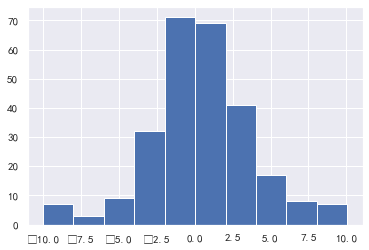

In [4]:
daily_df.pct_chg.hist()

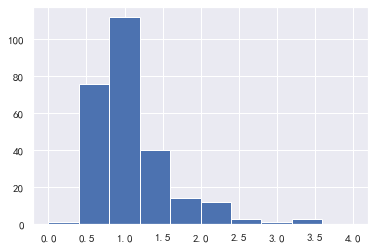

In [5]:
daily_df.vol_add.hist(bins = 10, range = (0,4))

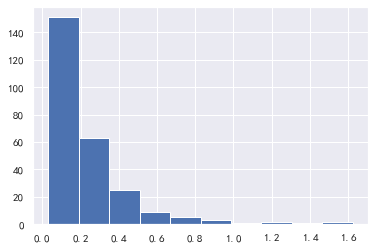

In [6]:
daily_df.close_pre5_std.hist()

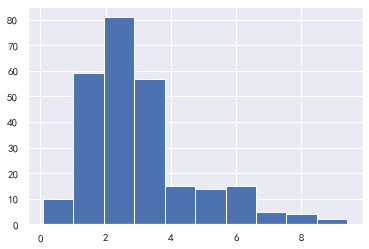

In [7]:
daily_df.change_pre5_std.hist()

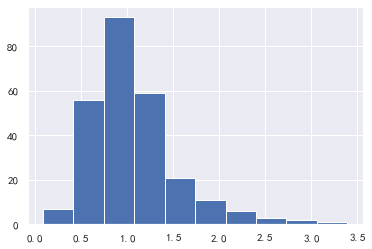

In [8]:
daily_df.quantity_relative_ratio.hist()

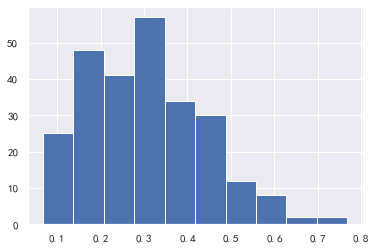

In [9]:
daily_df.vol_pre5_std.hist()

In [10]:
def select_stock1(daily_df)
    # 条件选股
    # 增量大于 1.5
    # 前几天的交易量变化不大 std < 
    # 价格变动应该也不大 std <
    # 这两天股票是涨的，并且涨幅在 0.1 到 8.0 之间

    select_df = daily_df.loc[daily_df.vol_add.values> 1.5 ,:]
    select_df = select_df.loc[select_df.vol_pre5_std.values < 0.3 ,:]
    select_df = select_df.loc[select_df.change_pre5_std.values < 1 ,:]
    select_df = select_df.loc[select_df.pct_chg.values < 8 ,:]
    select_df = select_df.loc[select_df.pct_chg.values > 1 ,:]
    select_df = select_df.loc[select_df.change_pre1.values < 8 ,:]
    select_df = select_df.loc[select_df.change_pre1.values > 1 ,:]
    print(select_df.shape)
    select_df.head()
    
    return select_df

(1, 58)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,vol_pre5_min,vol_pre5_amp,close_pre5_mean,close_pre5_std,close_pre5_max,close_pre5_min,change_pre5_mean,change_pre5_std,change_pre5_max,change_pre5_min
59,600667.SH,20191209,7.29,7.84,7.29,7.56,7.27,0.29,3.989,914191.49,...,0.815544,0.367207,7.128,0.092304,7.27,7.05,0.76118,0.591162,1.3947,-0.1416


In [11]:
def display_select(daily_df,ix ,trade_date = ""):
    if (ix-60) >0:
        state_ix = (ix-60)
    else:
        state_ix = 0
    if (ix+10) <len(daily_df):
        end_ix = (ix+10)
    else:
        end_ix = len(daily_df)

    display_df = daily_df.iloc[state_ix:end_ix, :]
    plot_K_df(display_df,focus_date = trade_date, SAVE = True)
    return 0


(69, 58)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,vol_pre5_min,vol_pre5_amp,close_pre5_mean,close_pre5_std,close_pre5_max,close_pre5_min,change_pre5_mean,change_pre5_std,change_pre5_max,change_pre5_min
263,600667.SH,20190211,5.64,5.73,5.58,5.70,5.56,0.14,2.5180,177582.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,600667.SH,20190212,5.73,5.98,5.70,5.85,5.70,0.15,2.6316,312923.11,...,NaN,NaN,5.700,NaN,5.70,5.7,2.518000,NaN,2.5180,2.5180
261,600667.SH,20190213,5.86,6.07,5.86,6.03,5.85,0.18,3.0769,387230.38,...,NaN,NaN,5.775,0.106066,5.85,5.7,2.574800,0.080327,2.6316,2.5180
260,600667.SH,20190214,6.08,6.18,5.91,5.98,6.03,-0.05,-0.8292,320535.15,...,NaN,NaN,5.860,0.165227,6.03,5.7,2.742167,0.295400,3.0769,2.5180
259,600667.SH,20190215,6.00,6.12,5.94,5.99,5.98,0.01,0.1672,350632.10,...,NaN,NaN,5.890,0.147648,6.03,5.7,1.849325,1.801899,3.0769,-0.8292


69


0

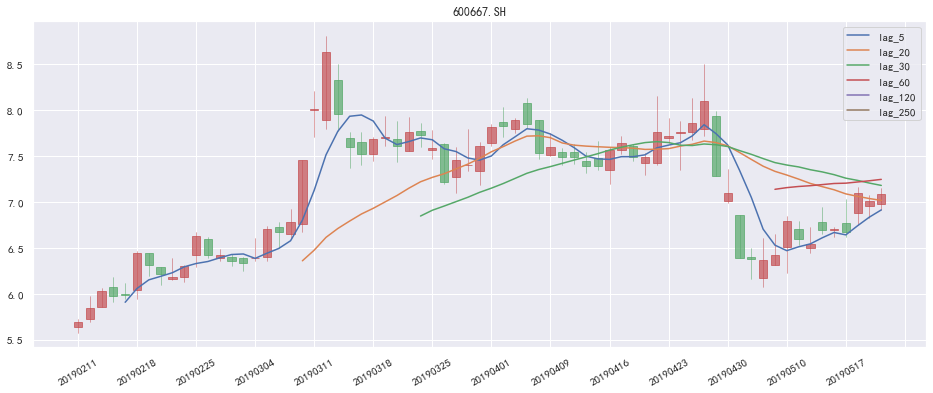

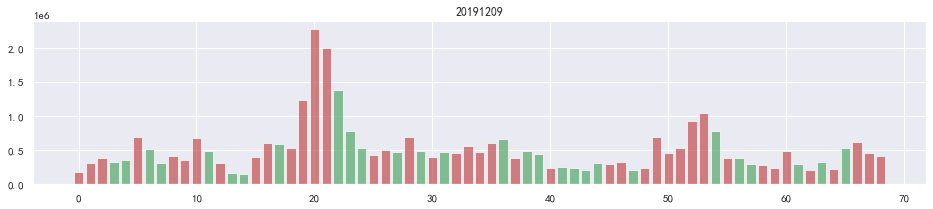

In [13]:

plot_K_df(display_df,title = select_df.trade_date.values[0])
